## FINAL PROJECT - Customer Churn Machine Learning

### By: Goban Pathmasenan, Shweta Dixit, Abhishek Sinha, Alec Miller, Mikhail Nepomnyaschy



In [1]:
# Load Required Libraries 
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn import tree # Docs here: http://scikit-learn.org/stable/modules/tree.html
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split # For dividing datasets into train/test(validation)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/Users/MillersFiles/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load the csv file and display first few entries
churn_df=pd.read_csv('customer_churn.csv')
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
# Before we can use the data we need to rename the columns to removes spaces and special characters
col_names = churn_df.columns.tolist()
print (col_names)

['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [4]:
# Rename columns
column_names = ['State','Acct_Len','Area_Code','Ph_Num','Int_Plan','Vmail','Vmail_Msg','Day_Mins',
                'Day_Calls','Day_Chrg','Evng_Mins','Evng_Calls','Evng_Chrg','Night_Mins','Night_Calls',
                'Night_Chrg','Intl_Mins','Intl_Calls','Intl_Chrg','CustServ_Calls','Churn']
churn_df = pd.read_csv('customer_churn.csv', header = 0, names = column_names )
churn_df.head(5)

,State,Acct_Len,Area_Code,Ph_Num,Int_Plan,Vmail,Vmail_Msg,Day_Mins,Day_Calls,Day_Chrg,...,Evng_Calls,Evng_Chrg,Night_Mins,Night_Calls,Night_Chrg,Intl_Mins,Intl_Calls,Intl_Chrg,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
# Look to see what types of data we have and if there are any missing data
churn_df.info()
churn_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Acct_Len          3333 non-null int64
Area_Code         3333 non-null int64
Ph_Num            3333 non-null object
Int_Plan          3333 non-null object
Vmail             3333 non-null object
Vmail_Msg         3333 non-null int64
Day_Mins          3333 non-null float64
Day_Calls         3333 non-null int64
Day_Chrg          3333 non-null float64
Evng_Mins         3333 non-null float64
Evng_Calls        3333 non-null int64
Evng_Chrg         3333 non-null float64
Night_Mins        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Chrg        3333 non-null float64
Intl_Mins         3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Chrg         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


,State,Acct_Len,Area_Code,Ph_Num,Int_Plan,Vmail,Vmail_Msg,Day_Mins,Day_Calls,Day_Chrg,...,Evng_Calls,Evng_Chrg,Night_Mins,Night_Calls,Night_Chrg,Intl_Mins,Intl_Calls,Intl_Chrg,CustServ_Calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,348-5767,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False.
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [6]:
# We have some columns with categorical information
# Convert categorical values (Churn, Internation Calls and Voicemail options) to numerical values
churn_df['Churn'] = churn_df['Churn'].map({'True.': 1, 'False.': 0})
churn_df['Int_Plan'] = churn_df['Int_Plan'].map({'yes': 1, 'no': 0})
churn_df['Vmail'] = churn_df['Vmail'].map({'yes': 1, 'no': 0})
churn_df.head(5)

,State,Acct_Len,Area_Code,Ph_Num,Int_Plan,Vmail,Vmail_Msg,Day_Mins,Day_Calls,Day_Chrg,...,Evng_Calls,Evng_Chrg,Night_Mins,Night_Calls,Night_Chrg,Intl_Mins,Intl_Calls,Intl_Chrg,CustServ_Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
# Remove columns with little to no predictive power
# Right off the bat, we see that there are 3333 unique phone numbers meaning one unique number for each incident
# So Ph_Num will definitely not be helpful for this modelling
# Let us look to see if State or Area_Code have any correlation to Churn

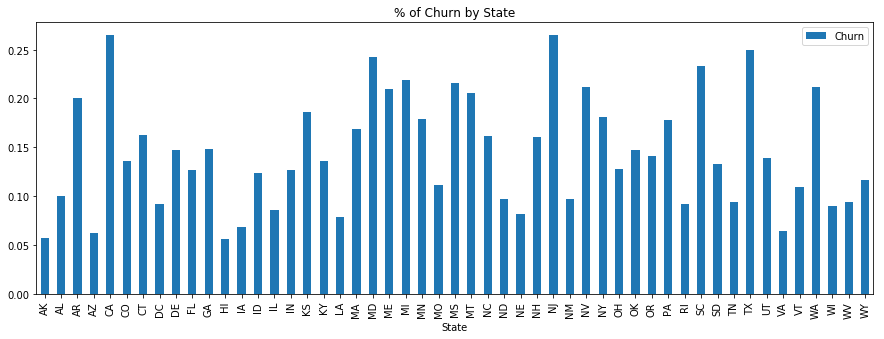

In [8]:
# Churn by State
churn_by_state = pd.pivot_table(churn_df, values='Churn', index=['State'],aggfunc=np.mean)
churn_by_state.sort_values(by='Churn', ascending=False)
churn_by_state.plot.bar(title='% of Churn by State',figsize=(15,5));

In [10]:
# Doesn't seem like State plays a role in predicting Churn

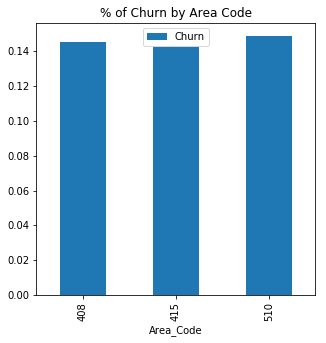

In [9]:
# Churn by Area_Code code
churn_by_area_code = pd.pivot_table(churn_df, values='Churn', index=['Area_Code'],aggfunc=np.mean)
churn_by_area_code.sort_values(by='Churn', ascending=False)
churn_by_area_code.plot.bar(title='% of Churn by Area Code',figsize=(5,5));

In [12]:
# Doesn't seem like Area_Code plays a role in predicting Churn either

In [10]:
# For now let us remove State, Area _Code and Ph_Num from our dataframe
churn_df = churn_df.drop(['State', 'Area_Code','Ph_Num'], axis=1)
churn_df.head()

,Acct_Len,Int_Plan,Vmail,Vmail_Msg,Day_Mins,Day_Calls,Day_Chrg,Evng_Mins,Evng_Calls,Evng_Chrg,Night_Mins,Night_Calls,Night_Chrg,Intl_Mins,Intl_Calls,Intl_Chrg,CustServ_Calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


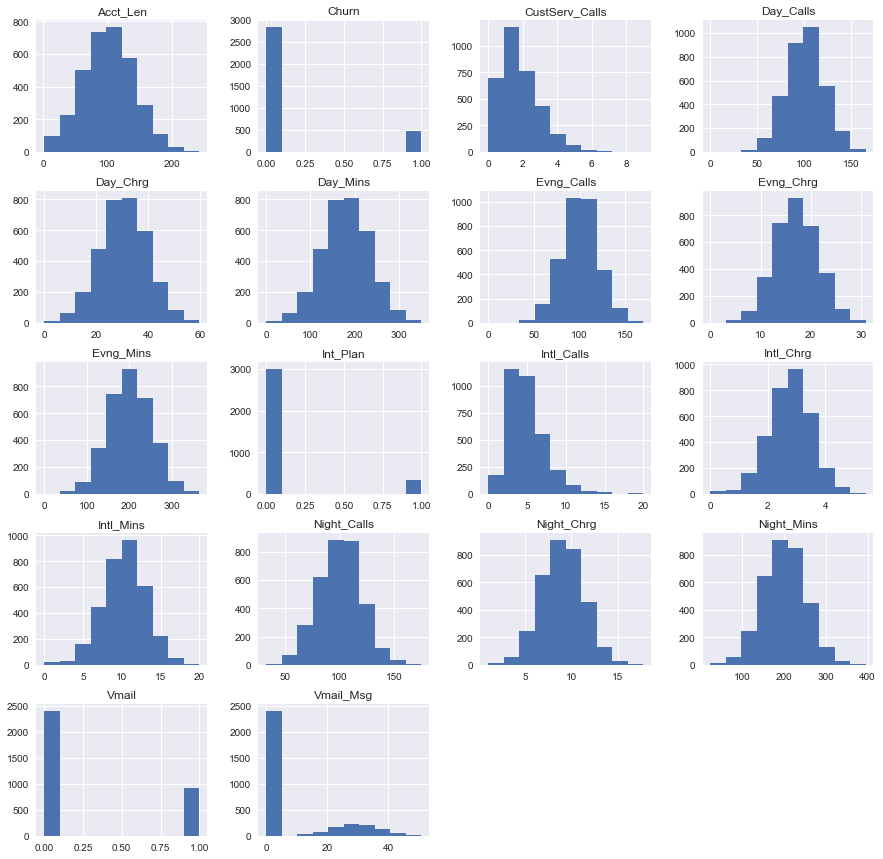

In [16]:
# Visualizing the distribution the data 
churn_df.hist();

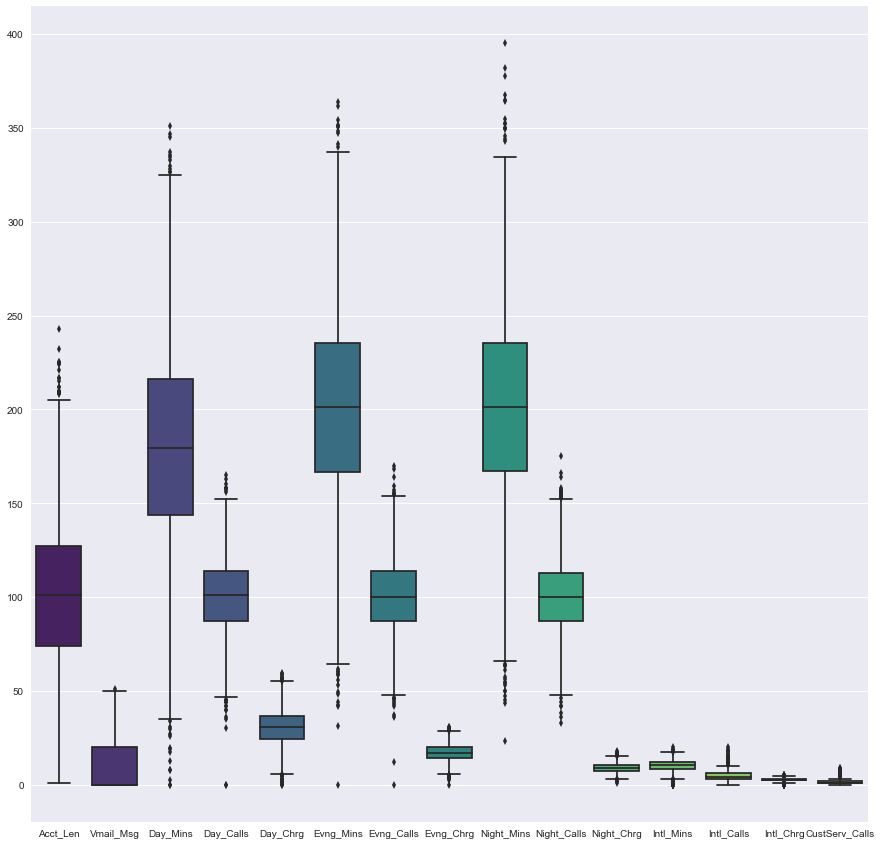

In [17]:
# Make boxplots for the data to see if any of them have large outliers
# Removing the categorical attributes for graphing purposes since values are always 0 or 1
# Creating a new dataframe without the categorical data
churn_stats_df = churn_df.drop(['Int_Plan','Vmail','Churn'],axis = 1)
sns.boxplot(data=churn_stats_df,palette='viridis')
sns.set(rc={'figure.figsize':(15,15)})

In [18]:
# From both the histogram and the boxplots we see that some of these numerical categories have a skewed distribution
# Whereas others have a large enough distribution
# Need to create a dataframe without skewed distribution before we can remove the outliers 
# This is done so as to not remove valuable data from the skewed attributes
non_skew_churn = churn_stats_df.drop(['Intl_Mins','Night_Chrg','Intl_Calls','Intl_Chrg','CustServ_Calls'],axis = 1)
non_skew_churn.head()

,Acct_Len,Vmail_Msg,Day_Mins,Day_Calls,Day_Chrg,Evng_Mins,Evng_Calls,Evng_Chrg,Night_Mins,Night_Calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121


In [19]:
# Removing outliers that are more than 3 standard deviations from the mean
clean_churn_df = non_skew_churn[non_skew_churn.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [20]:
# Now lets add back all the skewed and non numerical columns to this dataframe without outliers
# After we concate them we remove the rows with NaN (the ones that were outliers) to get the new dataset
clean_churn_df = pd.concat([churn_df.loc[:,'Intl_Mins',], clean_churn_df], axis=1)
clean_churn_df = pd.concat([churn_df.loc[:,'Night_Chrg',], clean_churn_df], axis=1)
clean_churn_df = pd.concat([churn_df.loc[:,'Intl_Calls',], clean_churn_df], axis=1)
clean_churn_df = pd.concat([churn_df.loc[:,'Intl_Chrg',], clean_churn_df], axis=1)
clean_churn_df = pd.concat([churn_df.loc[:,'CustServ_Calls',], clean_churn_df], axis=1)
clean_churn_df = pd.concat([churn_df.loc[:,'Int_Plan',], clean_churn_df], axis=1)
clean_churn_df = pd.concat([churn_df.loc[:,'Vmail',], clean_churn_df], axis=1)
clean_churn_df = pd.concat([churn_df.loc[:,'Churn',], clean_churn_df], axis=1)
clean_churn_df.dropna(inplace = True)

In [21]:
clean_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3275 entries, 0 to 3332
Data columns (total 18 columns):
Churn             3275 non-null int64
Vmail             3275 non-null int64
Int_Plan          3275 non-null int64
CustServ_Calls    3275 non-null int64
Intl_Chrg         3275 non-null float64
Intl_Calls        3275 non-null int64
Night_Chrg        3275 non-null float64
Intl_Mins         3275 non-null float64
Acct_Len          3275 non-null float64
Vmail_Msg         3275 non-null float64
Day_Mins          3275 non-null float64
Day_Calls         3275 non-null float64
Day_Chrg          3275 non-null float64
Evng_Mins         3275 non-null float64
Evng_Calls        3275 non-null float64
Evng_Chrg         3275 non-null float64
Night_Mins        3275 non-null float64
Night_Calls       3275 non-null float64
dtypes: float64(13), int64(5)
memory usage: 486.1 KB


In [34]:
# We see that the data has dropped from 3332 records to 3275 records after removing outliers
# Calculate the total number and percent of Churn in this new dataset
churn_sum = clean_churn_df['Churn'].sum()
churn_mean = clean_churn_df['Churn'].mean()
print("Total Churn for this data set is", np.round(churn_sum,decimals = 2))
print("Churn rate for this data set is ", np.round(churn_mean*100,decimals = 2),"%", sep="")

Total Churn for this data set is 472
Churn rate for this data set is 14.41%


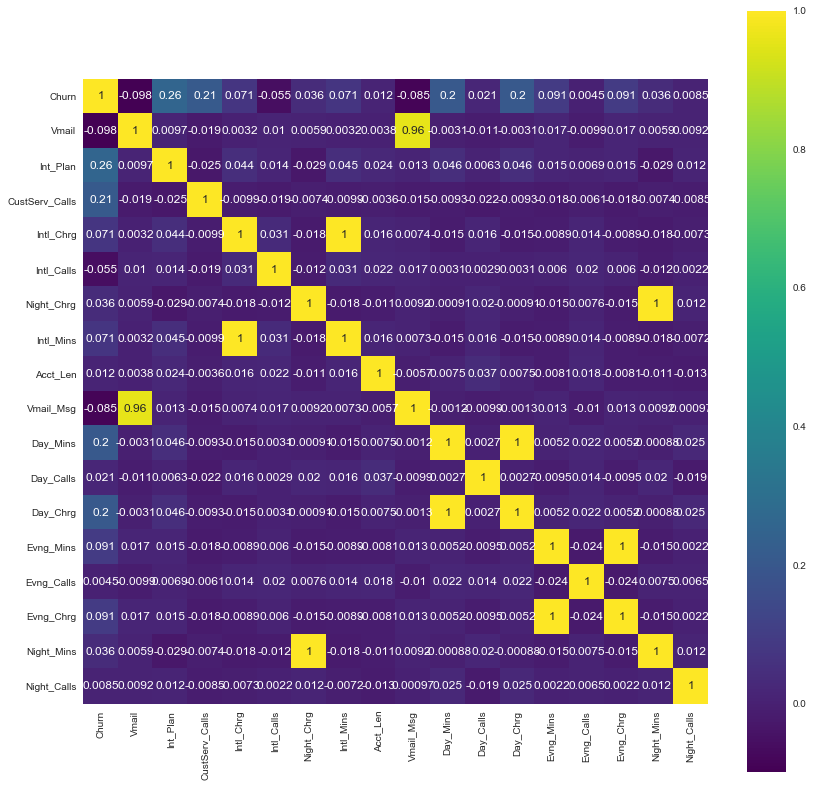

In [44]:
# Look to see the correlation amongst the attributes
corrmat=clean_churn_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(14, 14))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True, cmap="viridis", annot=True)
plt.show()

In [24]:
# Try and figure out which categories show strongest correlation with Churn
churn_corellation = churn_df[clean_churn_df.columns].corr()['Churn'][1:]
churn_corellation.sort_values(ascending=False)

Int_Plan          0.259852
CustServ_Calls    0.208750
Day_Mins          0.205151
Day_Chrg          0.205151
Evng_Mins         0.092796
Evng_Chrg         0.092786
Intl_Chrg         0.068259
Intl_Mins         0.068239
Night_Chrg        0.035496
Night_Mins        0.035493
Day_Calls         0.018459
Acct_Len          0.016541
Evng_Calls        0.009233
Night_Calls       0.006141
Intl_Calls       -0.052844
Vmail_Msg        -0.089728
Vmail            -0.102148
Name: Churn, dtype: float64

#### Based on this it seems like the strongest attributes are whether or not the customer has an international plan, number of times they have called customer service, number of Daytime mins and Daytime mins charge

## Modelling of the Churn Data

We have established that the dataset is not balanced given that amount of Churn is only about 14.4%. This means that the sample data available would not be ideal for a simple split of data into test and train for machine learning. We should train the model on a large portion of the dataset. Otherwise we’ll fail to read and recognise the underlying trend in the data. This will eventually result in a higher bias.

Instead what we should do is a k-fold cross validation, more specifically a stratified k-fold cross validation. This method allows the whole data set to be used for both training and validation. Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.It is generally a better approach when dealing with both bias and variance. A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance. Simply put the number of folds (e.g k = 10) would split the data into 10 subsamples and the cross validation process is repeated 10 times with each subsample being used as the test sample and the remaining 9 being used as the training. Then the average accuracy of all the validations can be used to produce a single value of estimation.

In [42]:
# Remove the Churn values from the data set and store it as the response value
y = clean_churn_df['Churn'].as_matrix().astype(np.int)
clean_churn_df = clean_churn_df.drop(['Churn'], axis=1)
clean_churn_df.head()

,Vmail,Int_Plan,CustServ_Calls,Intl_Chrg,Intl_Calls,Night_Chrg,Intl_Mins,Acct_Len,Vmail_Msg,Day_Mins,Day_Calls,Day_Chrg,Evng_Mins,Evng_Calls,Evng_Chrg,Night_Mins,Night_Calls
0,1,0,1,2.70,3,11.01,10.0,128.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0
1,1,0,1,3.70,3,11.45,13.7,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0
2,0,0,0,3.29,5,7.32,12.2,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0
3,0,1,2,1.78,7,8.86,6.6,84.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0
4,0,1,3,2.73,3,8.41,10.1,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0


In [24]:
# Convert the dataframe into a numpy matrix for cross validation
X = clean_churn_df.as_matrix().astype(np.float)
X

array([[  0.  ,   1.  ,   0.  , ...,  16.78, 244.7 ,  91.  ],
       [  0.  ,   1.  ,   0.  , ...,  16.62, 254.4 , 103.  ],
       [  0.  ,   0.  ,   0.  , ...,  10.3 , 162.6 , 104.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  24.55, 191.9 ,  91.  ],
       [  0.  ,   0.  ,   1.  , ...,  13.57, 139.2 , 137.  ],
       [  0.  ,   1.  ,   0.  , ...,  22.6 , 241.4 ,  77.  ]])

In [44]:
# Model 1
# Stratified K Fold modelling for Decision Tree
skf = cross_validation.StratifiedKFold(y, n_folds = 10, shuffle=True)
y_predicted = y.copy()
for train, test in skf: 
    X_train, X_test = X[train], X[test]
    y_train = y[train]
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    y_predicted[test] = clf.predict(X_test)

print('Accuracy with Decision Tree:{:.2f}' .format(metrics.accuracy_score(y, y_predicted)))

Accuracy with Decision Tree:0.91


In [45]:
# Model 2
# Stratified K Fold modelling for Naive Bayes
skf = cross_validation.StratifiedKFold(y, n_folds = 10, shuffle=True)
y_predicted = y.copy()
for train, test in skf: 
    X_train, X_test = X[train], X[test]
    y_train = y[train]
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    y_predicted[test] = clf.predict(X_test)

print('Accuracy with Naive Bayes:{:.2f}' .format(metrics.accuracy_score(y, y_predicted)))

Accuracy with Naive Bayes:0.86


In [46]:
# Model 3
# Stratified K Fold modelling for Gradient Boosting Classifier
skf = cross_validation.StratifiedKFold(y, n_folds = 10, shuffle=True)
y_predicted = y.copy()
for train, test in skf: 
    X_train, X_test = X[train], X[test]
    y_train = y[train]
    clf = ensemble.GradientBoostingClassifier()
    clf.fit(X_train,y_train)
    y_predicted[test] = clf.predict(X_test)

print('Accuracy with Gradient Boosting Classifier:{:.2f}' .format(metrics.accuracy_score(y, y_predicted)))

Accuracy with Gradient Boosting Classifier:0.95


In [47]:
# Model 4
# Stratified K Fold modelling for Random Forest Classifier
skf = cross_validation.StratifiedKFold(y, n_folds = 10, shuffle=True)
y_predicted = y.copy()
for train, test in skf: 
    X_train, X_test = X[train], X[test]
    y_train = y[train]
    clf = ensemble.RandomForestClassifier()
    clf.fit(X_train,y_train)
    y_predicted[test] = clf.predict(X_test)

print('Accuracy with Random Forest Classifier:{:.2f}' .format(metrics.accuracy_score(y, y_predicted)))

Accuracy with Random Forest Classifier:0.95


In [50]:
# Model 5
# Stratified K Fold modelling for Logistic Regression
skf = cross_validation.StratifiedKFold(y, n_folds = 10, shuffle=True)
y_predicted = y.copy()
for train, test in skf: 
    X_train, X_test = X[train], X[test]
    y_train = y[train]
    clf = linear_model.LogisticRegression()
    clf.fit(X_train,y_train)
    y_predicted[test] = clf.predict(X_test)

print('Accuracy with Logistic Regression:{:.2f}' .format(metrics.accuracy_score(y, y_predicted)))

Accuracy with Logistic Regression:0.86


## Summary of Results
### Accuracy with Logistic Regression:0.86
### Accuracy with Naive Bayes:0.86
### Accuracy with Decision Tree:0.91
### Accuracy with Random Forest Classifier:0.95
### Accuracy with Gradient Boosting Classifier:0.95

## Therefore the Random Forest Classifier or Gradient Boosting Classifier gives the best predictable model